# <HR> Risk Analysis Using Mote Carlo Simulation <HR>

## Import the required libraries

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Probability Distributions of Uncertain Factors

In [2]:
class ProbabilityDistribution:
    """ Methods of this class generate and display the probability distribution 
    of uncertain factors/parameters of Risk Model.
    """
    
    def __init__(self):
        pass
                
    def getdist_LaborCost(self):
        """ Labor cost data has Discrete Distribution
        return distribution of labor cost
        """
        laborCostperVehicle = np.array([1500, 1550, 1600, 1650, 1700])
        probability = (0.1, 0.2, 0.4, 0.2, 0.1)
        dist = stats.rv_discrete(name='LaborCost', values=(laborCostperVehicle, probability))
        return dist
    
    def getdist_PartCost(self):
        """Part cost data has Uniform Distribution
        return distribution of part cost
        """
        low, high = 16500, 16600
        dist = stats.uniform(loc=low, scale=high-low)
        return dist
    
    def getdist_FirstYearDemand(self):
        """ First year demand is normally distributed
        return distribution of first year demand
        """
        mean, std = 3000, 900
        dist = stats.norm(loc=mean,scale=std)
        return dist
        
    def getdistOfModelUncertainParams(self):
        """ return the distribution of model uncertain factors/parameters
        """
        distOfModelUncertainParams = {}
        distOfModelUncertainParams['cl'] = self.getdist_LaborCost()
        distOfModelUncertainParams['cpa'] = self.getdist_PartCost()
        distOfModelUncertainParams['d'] = self.getdist_FirstYearDemand()
        
        return distOfModelUncertainParams
    
    
    def displayDist(self, dist = None):
        """ to visulize the distribution of uncertain parameters
        """
        fig = plt.figure(figsize=(15,5))
        fig.subplots_adjust(hspace=0.2, wspace=0.4)
        fig.suptitle('Probability Distribution of Uncertain Factors', fontsize=15)
        
        ax1 = fig.add_subplot(1, 3, 1)
        x = np.array([1500, 1550, 1600, 1650, 1700])
        y = dist['cl'].pmf(x)
        ax1.plot(x, y, 'ro', ms=10, mec='r', alpha=0.4, lw=3)
        ax1.vlines(x, 0, y, colors='b', lw=4)
        ax1.title.set_text("Labor Cost Per Vehicle")
        ax1.grid()
        
        ax2 = fig.add_subplot(1, 3, 2)
        x = np.linspace(16500, 16600, 50)
        y = dist['cpa'].pdf(x)
        ax2.plot(x, y, ls='-', c='blue', alpha=0.4, lw=3)
        ax2.plot([x[0],x[-1]], [y[0],y[-1]], 'rs', c='red',linewidth=5)
        ax2.title.set_text("Part Cost Per Vehicle")
        ax2.grid()
        
        ax3 = fig.add_subplot(1, 3, 3)
        x = np.linspace(dist['d'].ppf(0.01),dist['d'].ppf(0.99),100)
        y = dist['d'].pdf(x)
        ax3.plot(x, y,'blue', lw=3, alpha=0.4)
        ax3.title.set_text("Demand")
        ax3.grid()

        plt.show()
    
    def __str__(self):
        return "Probability Distribution"

## To build the Risk Analysis Model  

In [3]:
class RiskAnalysis:
    
    def __init__(self, modelParams = None):
        self.modelParams = modelParams #Certain Parameters
        self.distOfModelUncertainParams = ProbabilityDistribution().getdistOfModelUncertainParams()
     
    def computeUncertainParam(self, dist):
        """return randomly computed value of uncertain parameter from the given distribution
        """
        return dist.rvs(size=1)[0]
    
    def simulateProfit(self, trial, _printResult):
        """ To perform the trial using the random value of uncertain parameters
        return computed value of desired quantity(i.e. NetProfit)
        """
        cl = self.computeUncertainParam(self.distOfModelUncertainParams['cl'])
        cpa = self.computeUncertainParam(self.distOfModelUncertainParams['cpa'])
        d = int(self.computeUncertainParam(self.distOfModelUncertainParams['d']))

        netProfit = (self.modelParams['p'] - cl - cpa) * d - self.modelParams['cp'] 
        
        if _printResult:
            print('{0:5d} | {1:9d} | {2:5.2f} | {3:6d} | {4:10.2f}'.format(trial,cl,cpa,d,netProfit))
               
        return netProfit
        
    def startSimulation(self, n = 0, _printResult = True):
        """ To perform the simulation n number of times 
        return result of n trials
        """
        if _printResult:
            print('{0} | {1} | {2} | {3} | {4}'.format('Trial','LaborCost','PartCost','Demand','NetProfit'))
            print("="*60)
        
        netProfit_data = []
        for i in range(n):
            netProfit = self.simulateProfit(i+1, _printResult)
            netProfit_data.append(netProfit)
        
        return netProfit_data
    
    def __str__(self):
        return "Risk Analysis"       

## Visualize the distribution of uncertain parameters

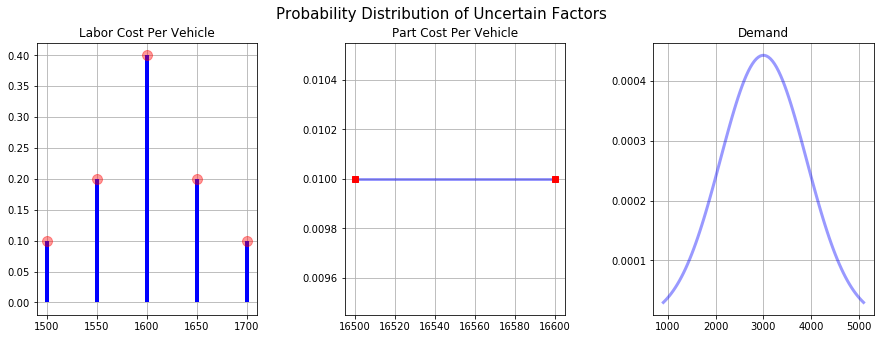

In [4]:
pd = ProbabilityDistribution()
dists = pd.getdistOfModelUncertainParams()
pd.displayDist(dists)

## Run Risk Analysis Model

In [5]:
model = RiskAnalysis(modelParams = {'p':32800, 'cp':28000000})
netProfit_data = model.startSimulation(n = 10000, _printResult = False)

## Probability Distribution of desired quantity(i.e. Net Profit)

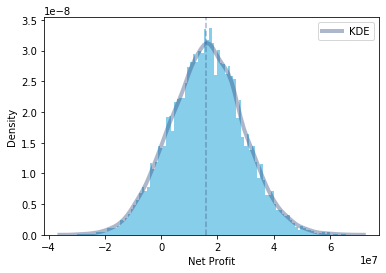

In [11]:
ax = sns.distplot(netProfit_data,
          bins=100,
          kde=True,
          color='skyblue',
          hist_kws={"linewidth": 15,'alpha':1},
          kde_kws={"color": (0.2,0.3,0.5,0.4), "lw": 4, "label": "KDE"},)
ax.set(xlabel='Net Profit', ylabel='Density')
ax.axvline(np.mean(netProfit_data),color=(0.2,0.3,0.5,0.4), linestyle='--')

## Mean value and Standard Deviation of NetProfit 

In [12]:
print("Mean of NetProfit: {0} \nStandard Deviation of NetProfit: {1}".format(np.mean(netProfit_data),np.std(netProfit_data)))

Mean of NetProfit: 16088549.70343813 
Standard Deviation of NetProfit: 13103153.89642266
